# Credit Score Regression
As a BI Manager I want to select the customers that may or may not be granted a loan.

- The first step, is to understand what is driving credit scores in a quantitative and robust way.
- Focus on 3 aspects:
- 1. Explanatory power of the chosen model? Is it helpful describing the situation? This can be measured by comparing the predicted values and the observed ones (r2_score for example).
- - Or the number of correctly classified observation if we use a logistic regression. 
- 2. If the model has power enough, we focus on What are the significant factors? Which factors/attributes/features are significant explaining the power of the model.
- - This can be done by checking the p-value (how weak the significance is) of the features, the smaller the pvalue the more significant it is. 
- 3. Sign of the significant effect. Positive or Negative?

## Step 1. Estimate whether the model does a good job at predicting the outcome in an unkown situation.

For each observation, the regression provides a credit score that is the one "estimated by the model" also called "Fitted values".
Then, we run correlations between the fitted values and the actual credit score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv(
    "../../DATA/HR_2.csv"
)

df = pd.DataFrame(df)

print(
    f"Dataset:\n{df.head(5)}\n"
)

print(
    f"Shape:\n{df.shape}"
)

print(
    f"\nMissing Values:\n{df.isnull().sum()}"
)

Dataset:
    Income  Rating  Cards  Age  Education  Gender Student Married  Ethnicity  \
0   14.891     283      2   34         11    Male      No     Yes  Caucasian   
1  106.025     483      3   82         15  Female     Yes     Yes      Asian   
2  104.593     514      4   71         11    Male      No      No      Asian   
3  148.924     681      3   36         11  Female      No      No      Asian   
4   55.882     357      2   68         16    Male      No     Yes  Caucasian   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331  

Shape:
(300, 10)

Missing Values:
Income       0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64


- Income: Represent the income in thousands of US dollars. 
- Rating: Represent a credit score.
- Cards: Number of credit cards that the user owns.
- Age: Age of the individual.
- Education: Number of years of education of the individual.
- Gender: Factor that says male. If the individual is a male or a female if the individual is a female.
- Student: Factor and tells us whether or not the individual is a student.
- Married: Tells us whether or not the individual is married.
- Ethnicity: Provides us with the ethnicity of the individual, for example, African American, Asian, Caucasian, etc.
- Balance: Corresponds to the average credit card debt for the individual.

In [8]:
df.describe()

,Income,Rating,Cards,Age,Education,Balance
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,44.054393,348.116667,3.026667,54.983333,13.393333,502.686667
std,33.863066,150.871547,1.351064,17.216982,3.075193,466.991447
min,10.354000,93.000000,1.000000,24.000000,5.000000,0.000000
25%,21.027500,235.000000,2.000000,41.000000,11.000000,15.750000
50%,33.115500,339.000000,3.000000,55.000000,14.000000,433.500000
75%,55.975500,433.000000,4.000000,69.000000,16.000000,857.750000
max,186.634000,949.000000,8.000000,91.000000,20.000000,1809.000000


Minimum:93.00
Mean:348.12
Median:339.00
Mode:344.00
Maximum:949.00



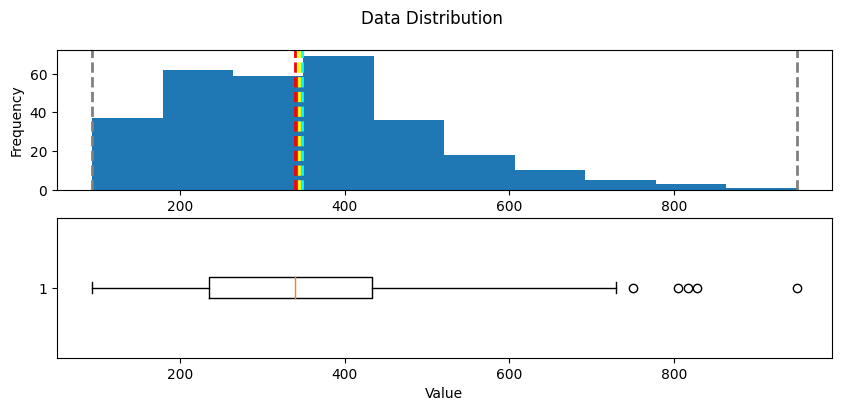

In [2]:
# Create a function that we can re-use
def show_distribution(var_data):
    """
    Show features distributions in the data set.
    """

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')


# Get the variable to examine
col = df['Rating']
# Call the function
show_distribution(col)

The distribution is skewed to the right, this means that most of our values seem to be between 100 and 400, but still are some values up to 900.

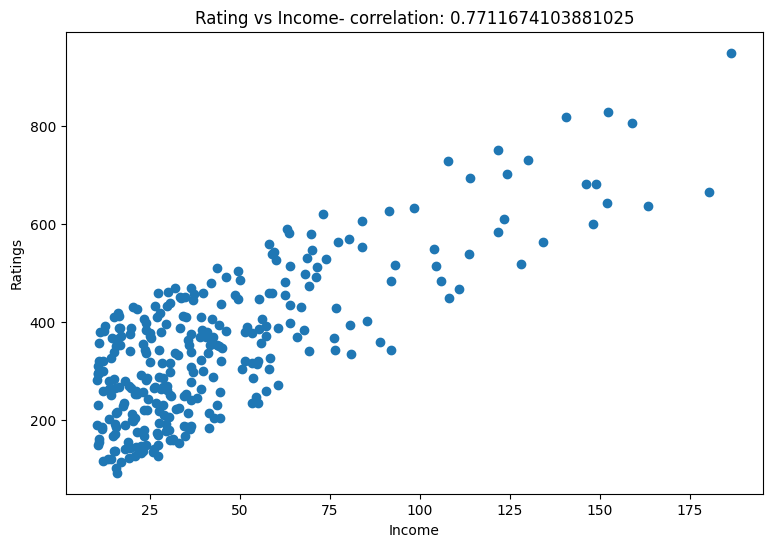

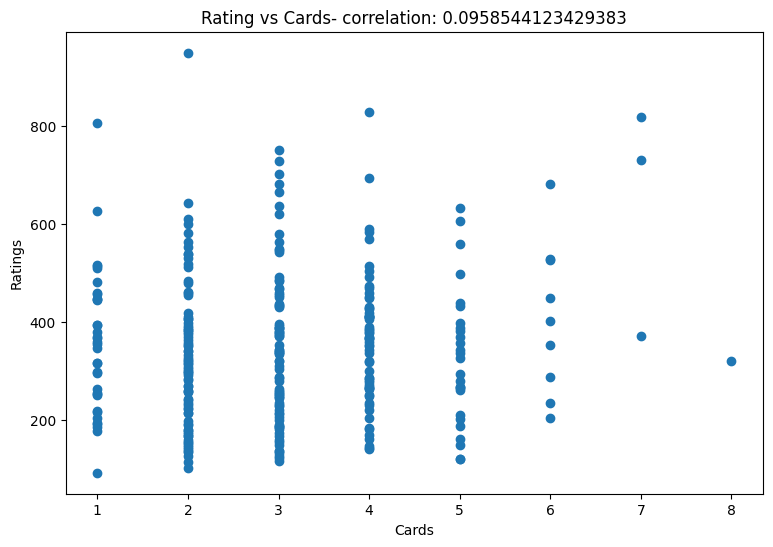

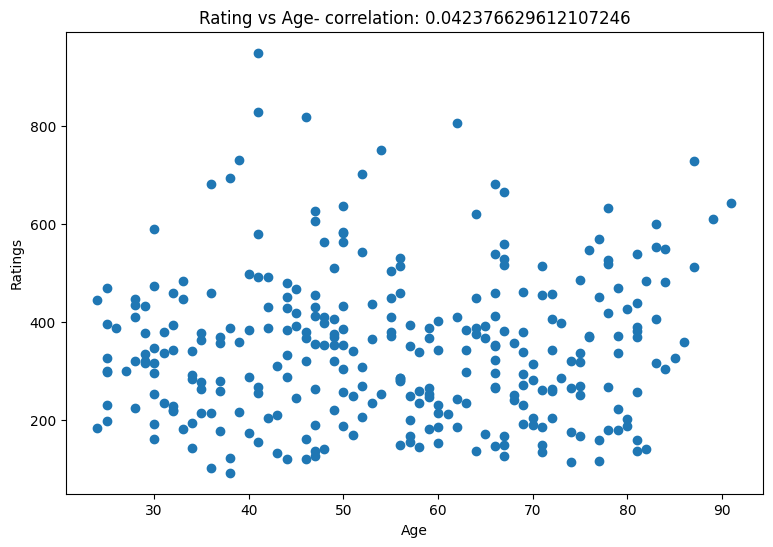

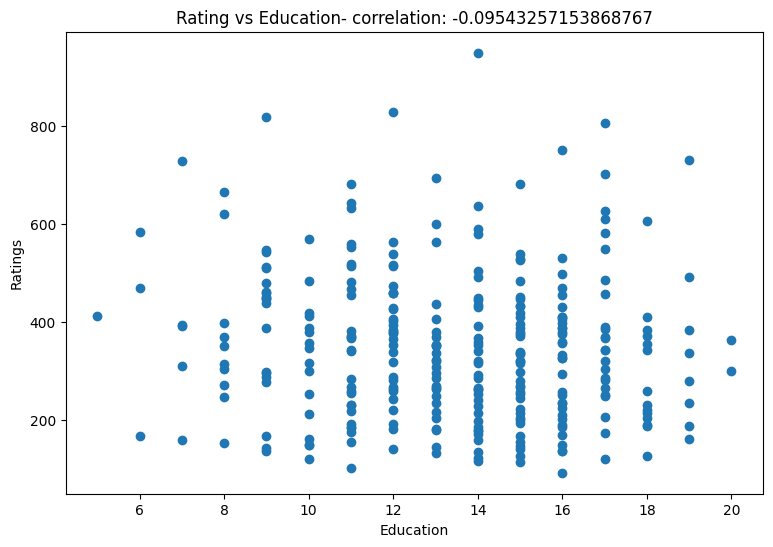

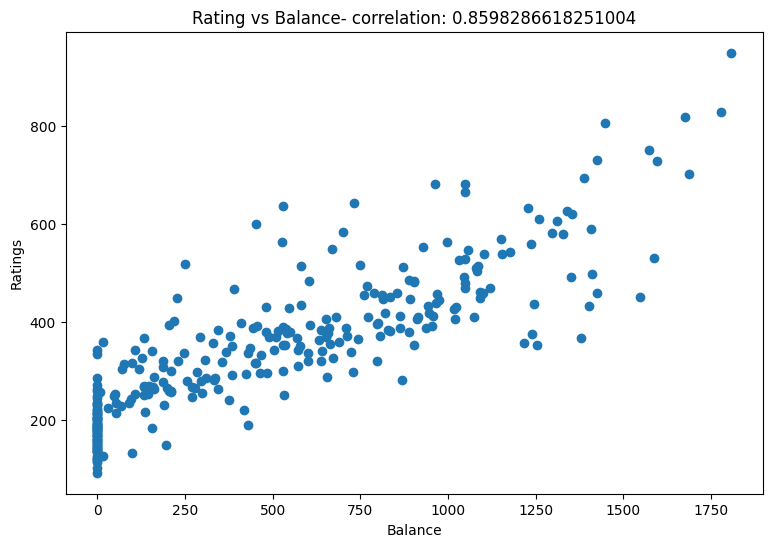

In [13]:
numeric_features = ["Income","Cards", "Age", "Education", "Balance"]
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rating']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Ratings')
    ax.set_title('Rating vs ' + col + '- correlation: ' + str(correlation))
plt.show()

As we can see, Income and Balance seem to have a strong effect when determining the ratings. At the same time, Age or the number of Cards do not seem as potential features that will decide on the rating significantly. But let's see what numbers say.

### Prepare Train set and Test set

In [3]:
# Separate features and labels
# into numpy arrays named X containing the features, and y containing the labels
X, y = df[["Income","Cards", "Age", "Education", "Gender","Student", "Married", "Ethnicity", "Balance"]].values, df['Rating'].values
print('Features:',X[:3], '\nLabels:', y[:3], sep='\n')


Features:
[[14.891 2 34 11 ' Male' 'No' 'Yes' 'Caucasian' 333]
 [106.025 3 82 15 'Female' 'Yes' 'Yes' 'Asian' 903]
 [104.593 4 71 11 ' Male' 'No' 'No' 'Asian' 580]]

Labels:
[283 483 514]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 210 rows
Test Set: 90 rows


### Prepare a Pipeline to be trained and used for inference

In [5]:
# Train the model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,8]
numeric_transformer = Pipeline(
                                steps=[
                                        ('scaler', StandardScaler()
                                    )
                                ]
)

# Define preprocessing for categorical features (encode them)
categorical_features = [4,5,6,7]
categorical_transformer = Pipeline(
                                    steps=[
                                            ('onehot', OneHotEncoder(handle_unknown='ignore')
                                        )
                                    ]
)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 8]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [4, 5, 6, 7])])),
                ('regressor', LinearRegression())])


MSE: 527.3816037310875
RMSE: 22.96479052225575
R2: 0.9789424979312564


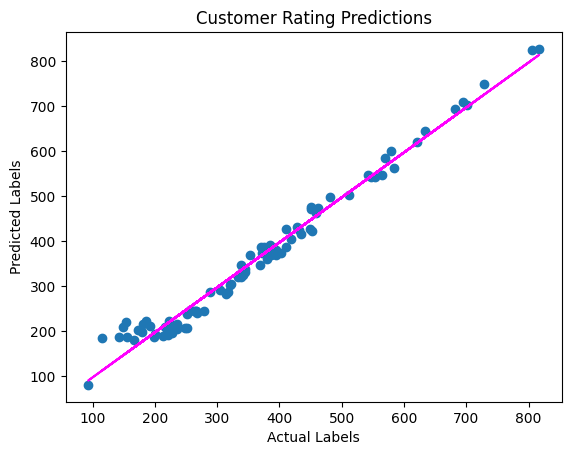

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Customer Rating Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

- Visual way to assess the quality of predictions by plotting the fitted values as a function of the actual credit score.
- Y-axis: Fitted Values.
- X-axis: Observed credit score.
We can see a strong steadily increasing diagonal-shape, that implies that values are highly correlated.

## Step 2: Now that we are confident in the quality of our model, let's look at the significance of the effects.

#### In R, The summary function provides all the relevant information about the model. In particular, it reports the level of statistical significance, with three stars when it's very strongly significant, to a dot, significance level very low, or nothing, no significant.

In [56]:
X_trans = pd.get_dummies(df, drop_first=True)

X, y = X_trans[["Income","Cards", "Age", "Education", "Balance", "Gender_Female","Student_Yes", "Married_Yes", "Ethnicity_Asian", "Ethnicity_Caucasian"]].values, X_trans['Rating'].values
print('Features:',X[:3], '\nLabels:', y[:3], sep='\n')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Features:
[[ 14.891   2.     34.     11.    333.      0.      0.      1.      0.
    1.   ]
 [106.025   3.     82.     15.    903.      1.      1.      1.      1.
    0.   ]
 [104.593   4.     71.     11.    580.      0.      0.      0.      1.
    0.   ]]

Labels:
[283 483 514]
Training Set: 210 rows
Test Set: 90 rows


In [78]:
import statsmodels.api as sm

model = sm.OLS.from_formula("Rating ~ Income+Cards+Age+Education+Balance+Gender_Female+Student_Yes+Married_Yes+Ethnicity_Asian+Ethnicity_Caucasian", data=X_trans)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1067.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          1.17e-221
Time:                        15:57:58   Log-Likelihood:                -1384.7
No. Observations:                 300   AIC:                             2791.
Df Residuals:                     289   BIC:                             2832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             140.8814      9.666     14.575      0.000     121.856     159.906
Income                  2.0947      0.048     43.533      0.000       2.000       2.189
Cards                  -0.7629      1.080     -0.706      0.480      -2.888       1.363
Age                     0.1446      0.086      1.684      0.093      -0.024       0.314
Education               0.1794      0.474      0.379      0.705      -0.753       1.112
Balance                 0.2314      0.004     63.189      0.000       0.224       0.239
Gender_Female           1.7704      2.918      0.607      0.544      -3.973       7.513
Student_Yes           -98.8048      4.960    -19.921      0.000    -108.567     -89.043
Married_Yes             3.1769      3.006      1.057      0.291      -2.739       9.092
Ethnicity_Asian        -4.4283      4.007     -1.105      0.270     -12.315       3.458
Ethnicity_Caucasian    -1.2506      3.534     -0.354      0.724      -8.206       5.705
==============================================================================
Omnibus:                       42.495   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.375
Skew:                          -0.987   Prob(JB):                     5.73e-13
Kurtosis:                       3.784   Cond. No.                     4.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The features with a significant impact in Rating, seem to be:
- - Income.
- - Balance.
- - Student.
####
- From these drivers, ordered to strongest driver to weakest (Checking T-value)
- - Balance > Income > Student

#### With sklearn:

In [63]:
from scipy import stats


lm = LinearRegression().fit(X_train,y_train)

lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_train)
new_X = np.append(np.ones((len(X_train),1)), X_train, axis=1)
M_S_E = (sum((y_train-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_vals =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_vals = np.round(p_vals,3)

In [88]:
import joblib

# Save the model as a pickle file
filename = '../models/Credit_Score_Regression_sklearn.pkl'
joblib.dump(lm, filename)


['../models/Credit_Score_Regression_sklearn.pkl']

In [71]:
column_names = X_trans.columns.drop("Rating").insert(0,"Intercept")

for it,p_val in enumerate(p_vals):
    print(
        f"{column_names[it]} -> {p_val}"
    )


Intercept -> 0.0
Income -> 0.0
Cards -> 0.585
Age -> 0.179
Education -> 0.767
Balance -> 0.0
Gender_Female -> 0.633
Student_Yes -> 0.0
Married_Yes -> 0.405
Ethnicity_Asian -> 0.382
Ethnicity_Caucasian -> 0.786


 we see that we have income, balance, and the fact that the applicant is a student or not that are very significant. The age is only weakly significant.

## Step 3: Focus on significant drivers/features and look at their EFFECTS, positive or negative ?

#### The drivers are not directly comparable, some variables are zero or one, some are categories and some are continuous variables with different ranges.

- For that reason, we should check the T-Values in absolut value. The Larger the value the better.
- In this case, Balance > Income > Student > Age
- Look at the signs, will tell us positive or negative effect.

In [79]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1067.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          1.17e-221
Time:                        16:04:16   Log-Likelihood:                -1384.7
No. Observations:                 300   AIC:                             2791.
Df Residuals:                     289   BIC:                             2832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             140.8814      9.666     14.575      0.000     121.856     159.906
Income                  2.0947      0.048     43.533      0.000       2.000       2.189
Cards                  -0.7629      1.080     -0.706      0.480      -2.888       1.363
Age                     0.1446      0.086      1.684      0.093      -0.024       0.314
Education               0.1794      0.474      0.379      0.705      -0.753       1.112
Balance                 0.2314      0.004     63.189      0.000       0.224       0.239
Gender_Female           1.7704      2.918      0.607      0.544      -3.973       7.513
Student_Yes           -98.8048      4.960    -19.921      0.000    -108.567     -89.043
Married_Yes             3.1769      3.006      1.057      0.291      -2.739       9.092
Ethnicity_Asian        -4.4283      4.007     -1.105      0.270     -12.315       3.458
Ethnicity_Caucasian    -1.2506      3.534     -0.354      0.724      -8.206       5.705
==============================================================================
Omnibus:                       42.495   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.375
Skew:                          -0.987   Prob(JB):                     5.73e-13
Kurtosis:                       3.784   Cond. No.                     4.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Remember that we should check the column "Estimate or Coefficient".
- If the value is negative, the driver shows a negative effect on the Target variable.
- In this case, if the client is a student, will impact negativley on the Rating.
- At the same time, clients with higher and positive Income and Balance, will have a positive impact on the Rating.

## Step 4: Report the relevant information for a manager, and let's do it in a visual way by just focusing on how important the factors are.

- We can rank them and categorize them by colors, wheter they are positive or negative.

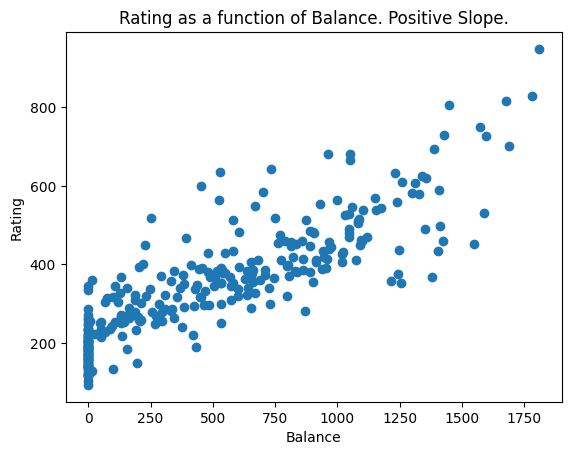

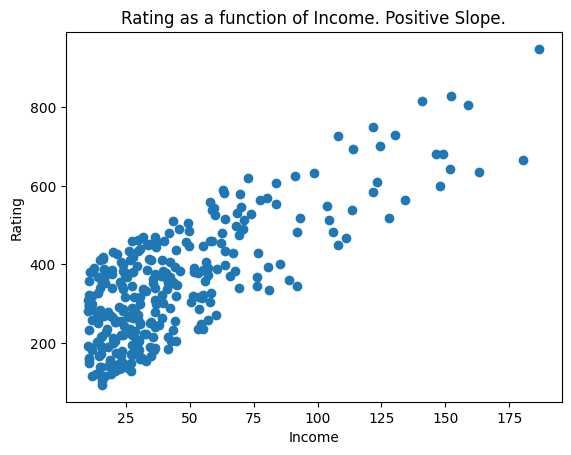

In [7]:
## PLOT RATING as a function of BALANCE

plt.scatter(df["Balance"], df["Rating"])
plt.title("Rating as a function of Balance. Positive Slope.")
plt.xlabel("Balance")
plt.ylabel("Rating")
## SLOPE IS POSITIVE, THEREFORE THE HIGHER THE BALANCE, THE HIGHER THE RATING.
plt.show()


plt.scatter(df["Income"], df["Rating"])
plt.title("Rating as a function of Income. Positive Slope.")
plt.xlabel("Income")
plt.ylabel("Rating")
## SLOPE IS POSITIVE, THEREFORE THE HIGHER THE INCOME, THE HIGHER THE RATING.
plt.show()

#### We could report the dependent variable, here the credit score, as a function of the most important factors we've identified thanks to regression.

- Which reports nicely the relationship between the dependent variable, and the balance.
- People will always understand easier a plot like this than a story about p-values and t-tests.

- Achtung!
- The relationship between your evaluations and staying at the company, for instance, may go two ways.
- The company may decide to fire an employee if she has poor evaluations.
- But if another employee decided to leave already, and that she's looking for the job, it may impact her performance. And there may be a delayed effect where the cause is the anticipated departure, leading to a decline in motivation, and the final consequence is a poor evaluation.
- Loop of causality -> Causes -> Endogeneity.
- Endogeneity -> Brings your effects being estimated inaccurately. So be careful when interpreting the effects you estimate. And see your results as clues, leading you to your destination, but not as decisive facts